In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

# Paths to CSV files
csv_files = [
    "./csv_files_after_method/fault_detection_results_tr3.csv",  # Transient
    "./csv_files_after_method/fault_detection_results_wt3.csv",  # Wattmetric
    "./csv_files_after_method/fault_detection_results_fh3.csv"
]


In [14]:
# Read and combine data
dfs = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dfs, ignore_index=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

In [17]:
# Encode categorical features
label_encoders = {}
categorical_cols = ["DetectedFaultDirection", "OriginalDirection", "algorithm_used"]
# Convert categorical columns to string before encoding
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for inverse transformation if needed

In [31]:
# Define features (X) and target (y)
features = [
    "RawVoltage1", "RawVoltage2", "RawVoltage3",
    "RawCurrent1", "RawCurrent2", "RawCurrent3",
    "U0", "I0", "U0_max", "I0_max",
    "dU0_dt", "dI0_dt", "dominant_freq_U0", "high_freq_energy_U0",
    "spectral_entropy_U0", "ActivePower", "ReactivePower",
    "PhaseDifference", "Q5", "PhaseDifference_5th"
]

In [50]:
# Select features and target variable
X = df[features]  # Drop non-relevant ID column
y = df["OriginalDirection"]  # Target variable is the actual correct fault direction

# # Encode the categorical target variable
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [52]:
# Train a machine learning model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
# Predict on test set
y_pred = model.predict(X_test)


In [54]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9340
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.91      0.93      0.92        75
           2       0.99      0.88      0.93        76
           3       0.88      0.93      0.90        76

    accuracy                           0.93       303
   macro avg       0.94      0.93      0.93       303
weighted avg       0.94      0.93      0.93       303



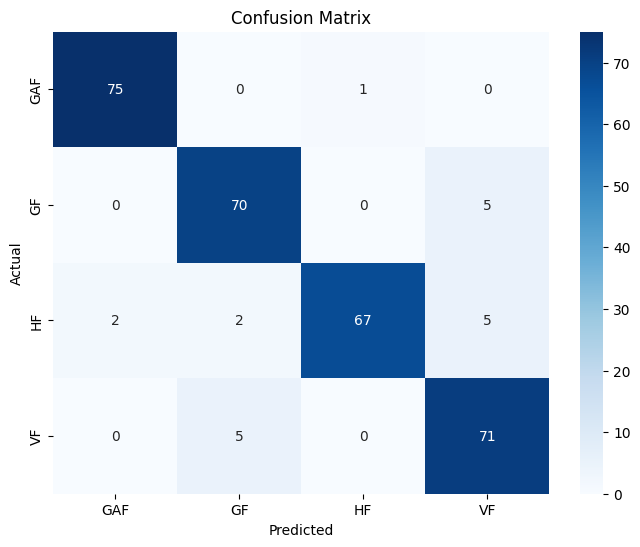

In [55]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders["OriginalDirection"].classes_,
            yticklabels=label_encoders["OriginalDirection"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

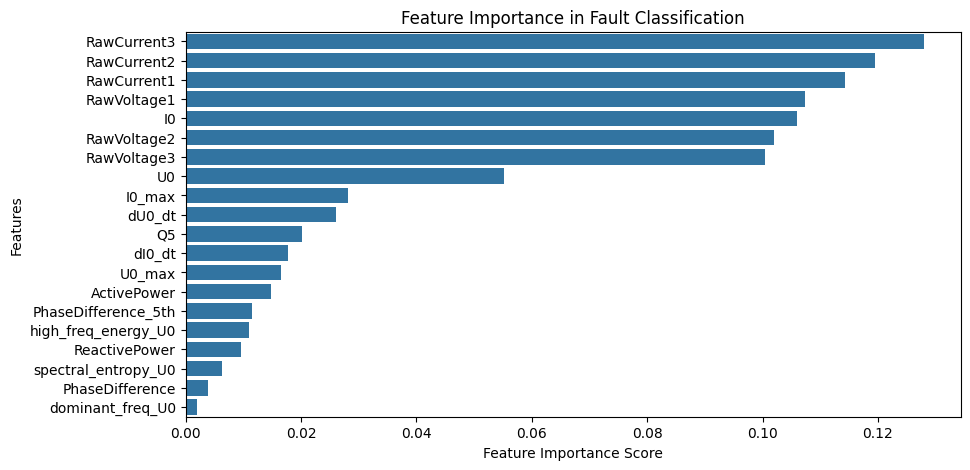

Feature Importance Scores:
                Feature  Importance
5           RawCurrent3    0.127946
4           RawCurrent2    0.119530
3           RawCurrent1    0.114268
0           RawVoltage1    0.107332
7                    I0    0.105932
1           RawVoltage2    0.101904
2           RawVoltage3    0.100424
6                    U0    0.055139
9                I0_max    0.028091
10               dU0_dt    0.026032
18                   Q5    0.020123
11               dI0_dt    0.017672
8                U0_max    0.016554
15          ActivePower    0.014851
19  PhaseDifference_5th    0.011562
13  high_freq_energy_U0    0.011017
16        ReactivePower    0.009615
14  spectral_entropy_U0    0.006248
17      PhaseDifference    0.003805
12     dominant_freq_U0    0.001956
Classification Report:
              precision    recall  f1-score   support

         GAF       0.97      0.99      0.98        76
          GF       0.91      0.93      0.92        75
          HF       0.99      0.

In [56]:

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Fault Classification")
plt.show()

# Print feature importance values
print("Feature Importance Scores:")
print(feature_importance_df)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders["OriginalDirection"].classes_))

<b>Trying a Different Model</b>

In [63]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Model Accuracy: 0.9340
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       0.90      0.93      0.92        75
           2       0.99      0.88      0.93        76
           3       0.89      0.92      0.90        76

    accuracy                           0.93       303
   macro avg       0.94      0.93      0.93       303
weighted avg       0.94      0.93      0.93       303



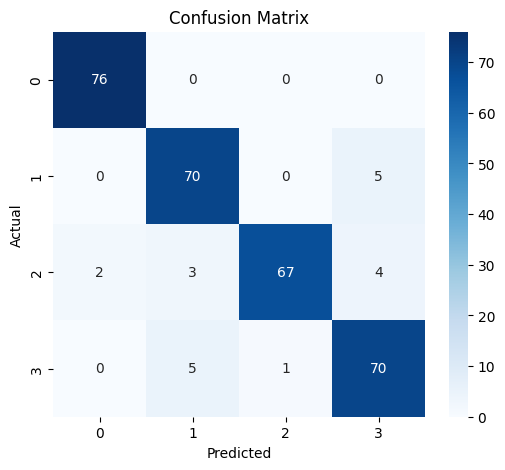

In [65]:
# Make predictions
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
